In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

caminho_2019 = "../dados/obitos-2019.csv"
caminho_2020 = "../dados/obitos-2020.csv"

dados_2019 = pd.read_csv(caminho_2019)
dados_2020 = pd.read_csv(caminho_2020)

print(f"2019 {dados_2019.shape}")
print(f"2020 {dados_2020.shape}")

2019 (12339, 6)
2020 (14666, 6)


In [4]:
dados_2019.head()

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
0,AC,OUTRAS,DOMICILIO,< 9,F,8
1,AC,OUTRAS,DOMICILIO,< 9,M,15
2,AC,OUTRAS,HOSPITAL,< 9,F,30
3,AC,OUTRAS,HOSPITAL,< 9,M,56
4,AC,OUTRAS,IGNORADO,< 9,M,1


In [5]:
dados_2020.sample(5)

,uf,tipo_doenca,local_obito,faixa_etaria,sexo,total
4957,RN,SEPTICEMIA,DOMICILIO,40 - 49,M,10
9208,PA,INDETERMINADA,OUTRO,70 - 79,M,1
6759,TO,INDETERMINADA,OUTRO,50 - 59,F,1
4134,BA,SEPTICEMIA,OUTROS_SERVICOS_SAUDE,40 - 49,F,15
8315,SP,INSUFICIENCIA_RESPIRATORIA,OUTROS_SERVICOS_SAUDE,60 - 69,F,124


In [8]:
len(dados_2020["uf"].unique())

27

In [9]:
dados_2020["tipo_doenca"].unique()

array(['OUTRAS', 'COVID', 'INDETERMINADA', 'INSUFICIENCIA_RESPIRATORIA',
       'PNEUMONIA', 'SEPTICEMIA', 'SRAG'], dtype=object)

In [10]:
dados_2019["tipo_doenca"].value_counts()

OUTRAS                        3834
PNEUMONIA                     2351
INSUFICIENCIA_RESPIRATORIA    2317
SEPTICEMIA                    2058
INDETERMINADA                 1297
SRAG                           481
COVID                            1
Name: tipo_doenca, dtype: int64

In [12]:
dados_2020["tipo_doenca"].value_counts()

OUTRAS                        3739
INSUFICIENCIA_RESPIRATORIA    2303
PNEUMONIA                     2194
COVID                         2063
SEPTICEMIA                    1993
INDETERMINADA                 1307
SRAG                          1067
Name: tipo_doenca, dtype: int64

In [16]:
total_obitos_2019 = dados_2019.groupby("tipo_doenca").sum()
total_obitos_2019

,total
tipo_doenca,
COVID,1
INDETERMINADA,6977
INSUFICIENCIA_RESPIRATORIA,100361
OUTRAS,658891
PNEUMONIA,225933
SEPTICEMIA,175104
SRAG,1497


In [18]:
total_obitos_2020 = dados_2020.groupby("tipo_doenca").sum()
total_obitos_2020

,total
tipo_doenca,
COVID,177299
INDETERMINADA,9063
INSUFICIENCIA_RESPIRATORIA,93304
OUTRAS,647807
PNEUMONIA,171938
SEPTICEMIA,153033
SRAG,15715


In [19]:
proporcao = total_obitos_2020/total_obitos_2019
proporcao

,total
tipo_doenca,
COVID,177299.000000
INDETERMINADA,1.298982
INSUFICIENCIA_RESPIRATORIA,0.929684
OUTRAS,0.983178
PNEUMONIA,0.761013
SEPTICEMIA,0.873955
SRAG,10.497662


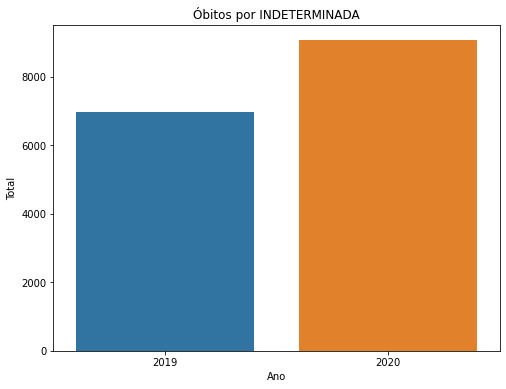

In [27]:
def grafico_comparativo(causa):

    total_2019 = dados_2019.groupby("tipo_doenca").sum()
    total_2020 = dados_2020.groupby("tipo_doenca").sum()
    lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]
    dados = pd.DataFrame({"Total": lista,
                          "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa}")
    plt.show()

    

grafico_comparativo("INDETERMINADA")

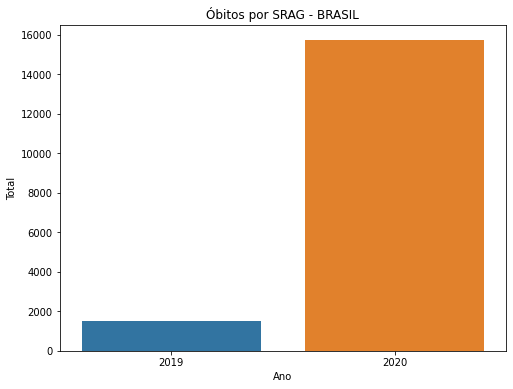

In [61]:
def grafico_comparativo(causa, estado="BRASIL"):

    if estado == "BRASIL":
        total_2019 = dados_2019.groupby("tipo_doenca").sum()
        total_2020 = dados_2020.groupby("tipo_doenca").sum()
        lista = [int(total_2019.loc[causa]), int(total_2020.loc[causa])]

    else:
        total_2019 = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
        total_2020 = dados_2020.groupby(["uf", "tipo_doenca"]).sum()
        lista = [int(total_2019.loc[estado, causa]), int(total_2020.loc[estado,causa])]
    dados = pd.DataFrame({"Total": lista,
                          "Ano": [2019, 2020]})

    plt.figure(figsize=(8,6))
    sns.barplot(x = "Ano", y = "Total", data = dados)
    plt.title(f"Óbitos por {causa} - {estado}")
    plt.show()

    

grafico_comparativo("SRAG")

In [55]:
t = dados_2019.groupby(["uf", "tipo_doenca"]).sum()
t.loc["SP", "SRAG"]

total    293
Name: (SP, SRAG), dtype: int64

## Desafio 01: Acessar o portal e verificar como são classificados os dados

## Desafio 02: Corrigir o erro do Thiago na contagem de casos

## Desafio 03: Explorar os outros campos da base

## Desafio 04: Add na função a opção de filtrar por estaddo

## Desafio 05: Entender como funciona uma aplicação web

## Desafio 06: Melhorar a função para aceitar apenas o estado

## Desafio 07: Estudar a documentação do Streamlit

